<a href="https://colab.research.google.com/github/vikasmaha/retail_sales_prediction/blob/main/Retail_Sales_Prediction_ML_Submission_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**  vikash kumar


# **Project Summary -**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


# **GitHub Link -**

# **Problem Statement**


Rossman, a leading retail company, wants to accurately forecast their sales for each of their stores across multiple locations. They have historical sales data, as well as information about store attributes, promotions, and competition, which they believe can be used to predict future sales.

The challenge is to build a predictive model that takes into account various factors and accurately predicts the sales for each store on a given day. This will help Rossman make informed decisions about inventory management, staffing, and promotion strategies.

The goal is to develop a machine learning model that can accurately predict sales for each store, based on historical data and other relevant variables. The model should be able to handle different store locations and characteristics, as well as incorporate information about promotions and competition.

Key Objective :

1. Develop a robust machine learning model that accurately predicts daily sales for each Rossman store.

2. Identify the key variables and features that have the most impact on sales and incorporate them into the model.

3. Handle the variability and uniqueness of each store, taking into account location-specific factors.

4. Consider external factors such as promotions and competition to enhance the predictive accuracy of the model.

5. Optimize the model's performance by minimizing errors and maximizing the prediction accuracy.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sales_df = pd.read_csv("/content/drive/MyDrive/data/Rossmann Stores Data.csv")
store_df = pd.read_csv("/content/drive/MyDrive/data/store.csv")

### Dataset First View

In [ ]:
# Dataset First Look
pd.concat([sales_df.head(),sales_df.tail()])

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
# dataset first view of store_df
pd.concat([store_df.head(),store_df.tail()])

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [ ]:
# sales_df Dataset Rows & Columns count
print(sales_df.shape)
print(f'the number of rows is {sales_df.shape[0]} and column is {sales_df.shape[1]}')

(1017209, 9)
the number of rows is 1017209 and column is 9


In [ ]:
# store_df dataset rows & column count
print(store_df.shape)
print(f'the number of rows is {store_df.shape[0]} and column is {store_df.shape[1]}')

(1115, 10)
the number of rows is 1115 and column is 10


### Dataset Information

In [ ]:
# Dataset Info
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Dataset Info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
sales_df[sales_df.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [ ]:
# Dataset Duplicate Value Count
store_df[store_df.duplicated()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
def sales_df_info():
  temp = pd.DataFrame(index=sales_df.columns)
  temp['data_types'] = sales_df.dtypes
  temp['not null value'] = sales_df.count()
  temp['null values'] = sales_df.isnull().sum()
  temp['%of null value'] = sales_df.isnull().mean()
  temp['unique count'] = sales_df.nunique()
  return temp

sales_df_info()

,data_types,not null value,null values,%of null value,unique count
Store,int64,1017209,0,0.0,1115
DayOfWeek,int64,1017209,0,0.0,7
Date,object,1017209,0,0.0,942
Sales,int64,1017209,0,0.0,21734
Customers,int64,1017209,0,0.0,4086
Open,int64,1017209,0,0.0,2
Promo,int64,1017209,0,0.0,2
StateHoliday,object,1017209,0,0.0,5
SchoolHoliday,int64,1017209,0,0.0,2


In [ ]:
#null values in sales_df
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
#null values in stores_df
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### What did you know about your dataset?

The Rossman sales dataset contains historical sales data for different stores of the Rossman retail company. The dataset includes various features that can be used to predict the sales for each store on a given day. Although I don't have access to the dataset itself, I can provide you with a general description of the typical features and information that may be present in the dataset:

1. Store ID: A unique identifier for each store in the dataset.
2. Date: The date on which the sales were recorded.
3. Sales: The target variable, representing the actual sales for a particular store on a specific day.
4. Customers: The number of customers who made purchases on that day.
5. Store Open: A binary variable indicating whether the store was open or closed on a particular day.
6. Promo: A binary variable representing whether a store was running a promotion on that day.
7. State Holiday: A categorical variable indicating if it was a state holiday (e.g., Christmas, Easter, etc.) on that day.
8. School Holiday: A binary variable indicating if it was a school holiday on that day.
9. Store Type: A categorical variable representing the type of store (e.g., Supermarket, Hypermarket, etc.).
10. Assortment: A categorical variable indicating the assortment level of products available in a store (e.g., basic, extra, extended).
11. Competition Distance: The distance to the nearest competitor store.
12. Competition Open Since: The year and month when the nearest competitor store opened.
13. Promo2: A binary variable indicating whether a store is participating in a continuous promotion (Promo2) or not.
14. Promo2 Since: The year and calendar week when the store started participating in Promo2.
15. Promo2 Interval: The consecutive months that the promotion is active after it starts.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
sales_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# dataset column (store_df)
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe (sales_df)
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
# dataset describe (store_df)
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description

1. Store ID: A unique identifier for each store in the dataset.
2. Date: The date on which the sales were recorded.
3. Sales: The target variable, representing the actual sales for a particular store on a specific day.
4. Customers: The number of customers who made purchases on that day.
5. Store Open: A binary variable indicating whether the store was open or closed on a particular day.
6. Promo: A binary variable representing whether a store was running a promotion on that day.
7. State Holiday: A categorical variable indicating if it was a state holiday (e.g., Christmas, Easter, etc.) on that day.
8. School Holiday: A binary variable indicating if it was a school holiday on that day.
9. Store Type: A categorical variable representing the type of store (e.g., Supermarket, Hypermarket, etc.).
10. Assortment: A categorical variable indicating the assortment level of products available in a store (e.g., basic, extra, extended).
11. Competition Distance: The distance to the nearest competitor store.
12. Competition Open Since: The year and month when the nearest competitor store opened.
13. Promo2: A binary variable indicating whether a store is participating in a continuous promotion (Promo2) or not.
14. Promo2 Since: The year and calendar week when the store started participating in Promo2.
15. Promo2 Interval: The consecutive months that the promotion is active after it starts.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable of sales_df.
def check_unique():
  temp_unique = pd.DataFrame(index = sales_df.columns)
  temp_unique['unique'] =  sales_df.nunique()
  return temp_unique
check_unique()

,unique
Store,1115
DayOfWeek,7
Date,942
Sales,21734
Customers,4086
Open,2
Promo,2
StateHoliday,5
SchoolHoliday,2


In [ ]:
# Check Unique Values for each variable of store_df.
def check_unique():
  temp_unique = pd.DataFrame(index = store_df.columns)
  temp_unique['unique'] =  store_df.nunique()
  return temp_unique
check_unique()

,unique
Store,1115
StoreType,4
Assortment,3
CompetitionDistance,654
CompetitionOpenSinceMonth,12
CompetitionOpenSinceYear,23
Promo2,2
Promo2SinceWeek,24
Promo2SinceYear,7
PromoInterval,3


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
# Null value count for store df
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

CompetitionDistance- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

CompetitionOpenSinceYear- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

In [ ]:
# filling competition distance with the median value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [ ]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
# imputing the nan values of promo2 related columns with 0
store_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_df['Promo2SinceYear'].fillna(value=0,inplace=True)
store_df['PromoInterval'].fillna(value=0,inplace=True)

In [ ]:
#  cheking after filling null value
def store_df_info():
  temp_df = pd.DataFrame(index = store_df.columns)
  temp_df['null value'] = store_df.isnull().sum()
  return temp_df

store_df_info()

,null value
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [ ]:
# Merging the two Datasets
# merge the datasets on stores data
df = sales_df.merge(store_df, on="Store", how="left")

In [ ]:
#first five rows of the merged dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
#shape of the dataframe
df.shape

(1017209, 18)

**Unique Values in Categorical**

In [ ]:
#datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
#creating a categorical column list
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [ ]:
#checking the unique values involved and if all the values are in appropriate datatypes
for i in categorical_variables:
  print(f'Unique values for {i}: {df[i].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [ ]:
#change datatype into int type
df['StateHoliday'].replace({'0':0}, inplace=True)
df['Date']=pd.to_datetime(df['Date'],errors='coerce') # converting datetime object to  datetime
df.StateHoliday.replace({'0' : 0,'a' : 1,'b' : 1,'c' : 1}, inplace=True)

In [ ]:
# Extracting from date
#creating features from the date
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['weekofyear'] = pd.DatetimeIndex(df['Date']).weekofyear
df['dayofyear'] = pd.DatetimeIndex(df['Date']).dayofyear
df["Week"]=df["Date"].dt.week%4
df['Quarter'] = df['Date'].dt.quarter

years = df['year'].unique()

### What all manipulations have you done and insights you found?

we have two data set of rossman sales data and store dataset . store dataset have 10 column and 1115 rows . which have some null values present in column which is given below and i have filled is na value with median,mode and 0 values.
and in rossman sales data have not any null values present in the dataset.
after the filling na value i have mearged the both dataset.

Store                          0

StoreType                      0

Assortment                     0

CompetitionDistance            3

CompetitionOpenSinceMonth    354

CompetitionOpenSinceYear     354

Promo2                         0

Promo2SinceWeek              544

Promo2SinceYear              544

PromoInterval                544

In [ ]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year,month,weekofyear,dayofyear,Week,Quarter
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,3.052470e-02,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03,2.013832e+03,5.846762e+00,2.361551e+01,1.622764e+02,1.509300e+00,2.294252e+00
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,1.720261e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03,7.773960e-01,3.326097e+00,1.443338e+01,1.016162e+02,1.113273e+00,1.081850e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,1.100000e+01,7.700000e+01,1.000000e+00,1.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03,2.014000e+03,6.000000e+00,2.200000e+01,1.530000e+02,2.000000e+00,2.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03,2.014000e+03,8.000000e+00,3.500000e+01,2.410000e+02,3.000000e+00,3.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,2.015000e+03,1.200000e+01,5.200000e+01,3.650000e+02,3.000000e+00,4.000000e+00


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart -1

Text(0.5, 0, 'Competition Distance Distribution Plot')

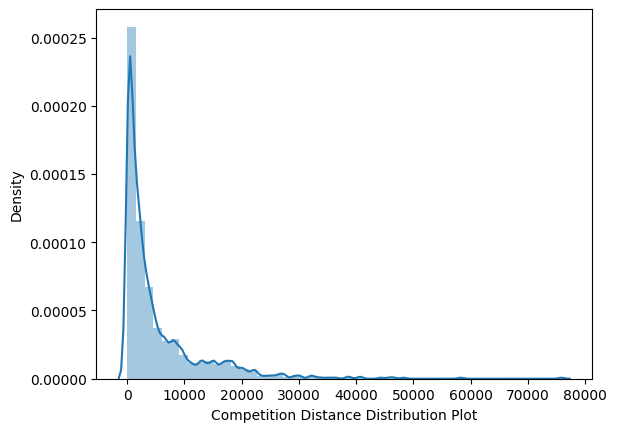

In [ ]:
#  #distribution plot of competition distance
sns.distplot(x=df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

distribution of Sales has a very long tail. It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.

Why did you pick the specific chart?

The  distribution plot, is used to visualize the distribution of a single variable or compare the distributions between multiple variables. It combines elements of a histogram, a kernel density estimation (KDE) plot, and a rug plot to provide a comprehensive view of the data's distribution.

#### Chart - 2

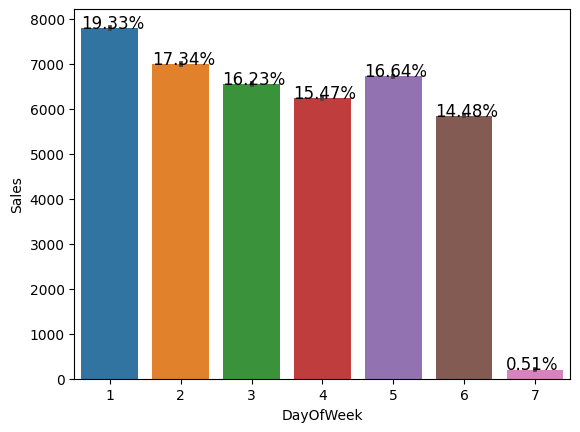

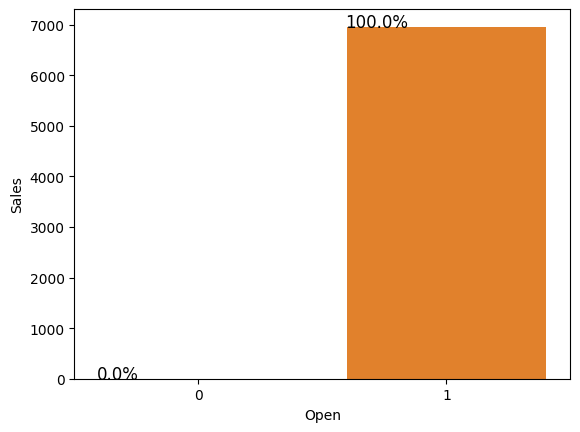

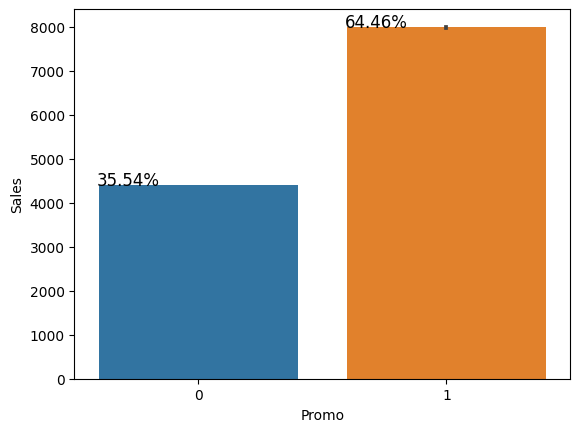

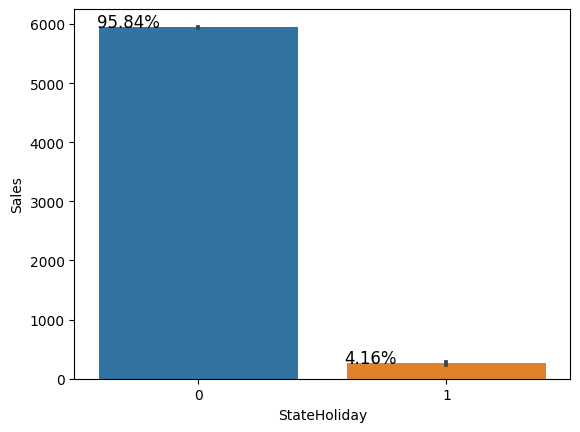

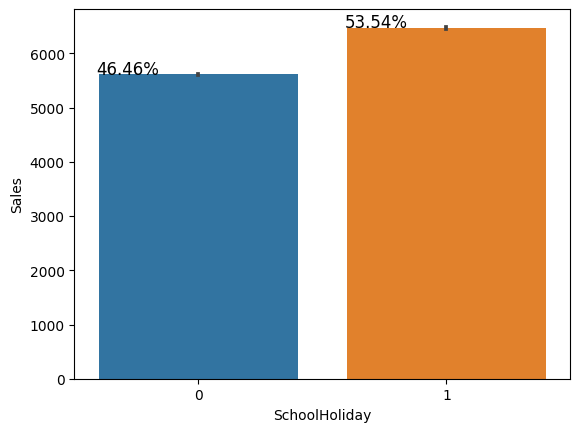

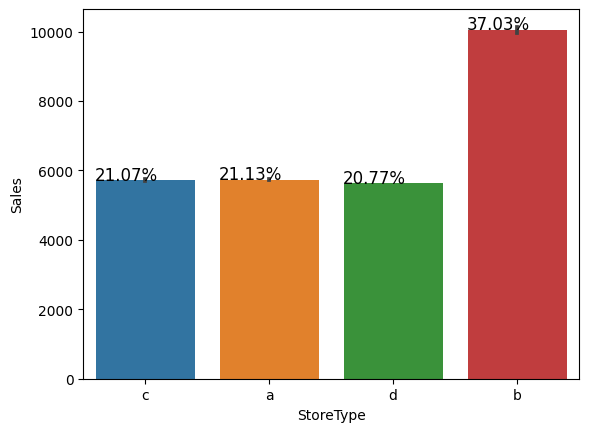

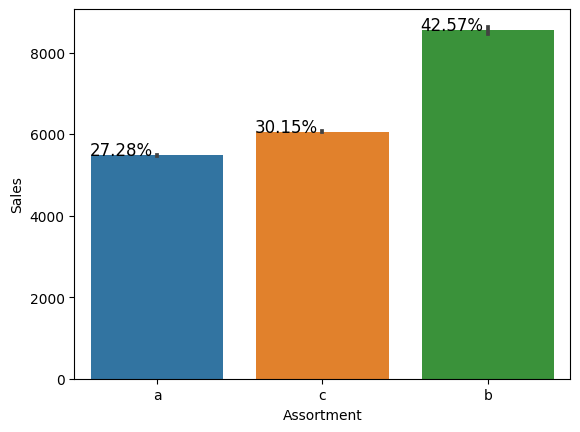

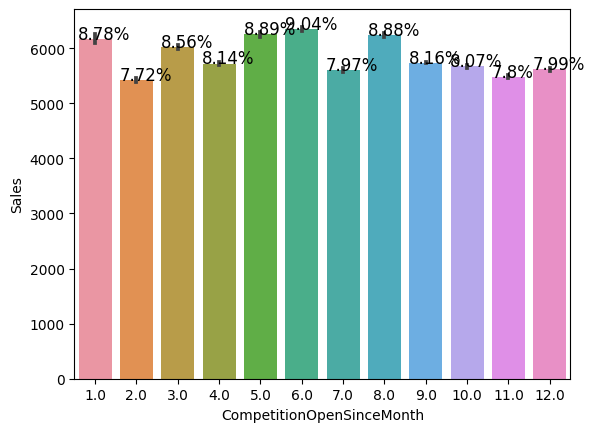

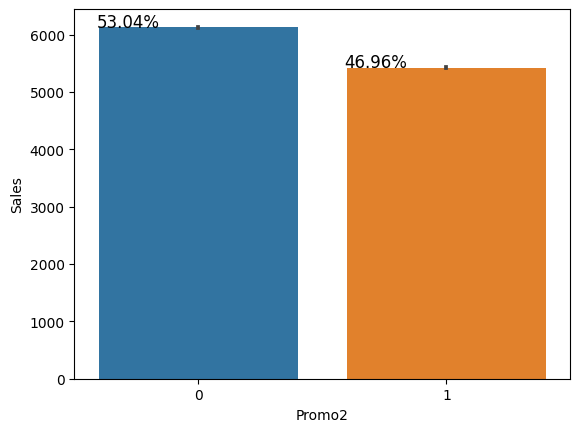

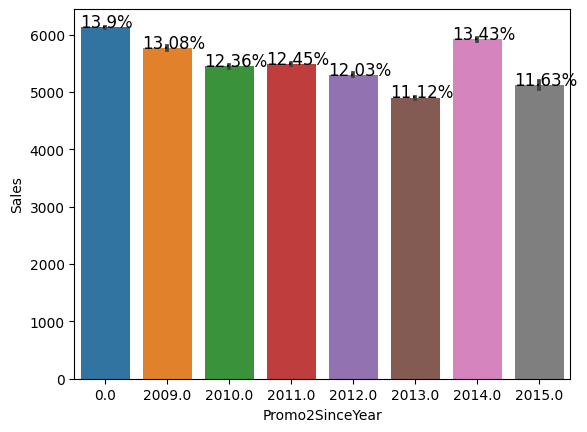

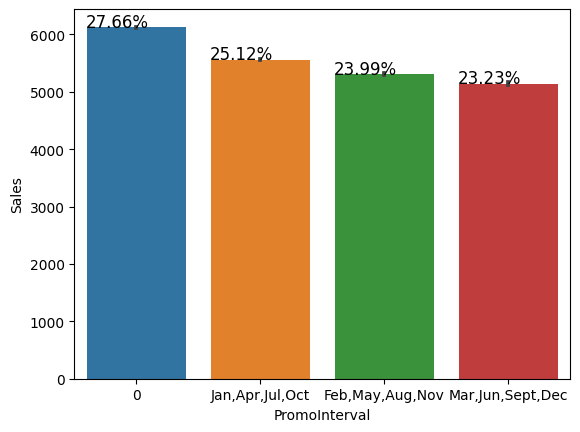

In [ ]:
# Chart - 2 visualization code
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for i in categorical_variables:
  ax = sns.barplot(x=df[i], y=df['Sales'])
  totals = []
  for j in ax.patches: #for every patch in the barplot ax
      totals.append(j.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for k in ax.patches:
      ax.text(k.get_x() - .01, k.get_height() + .5, \
              str(round((k.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

##### 1. Why did you pick the specific chart?

The choice of using a barplot as a visualization tool depends on the nature of the data and the specific insights or comparisons you want to convey. Here are a few reasons why someone might choose a barplot are for categorical data in when you want to compare different categories. Each category is represented by a bar,and height of bar correspond to the value of category. and Discrete Data, Visualizing Relationships, Simplicity and Clarity of Barplots are relatively simple and easy to interpret. They provide a clear visual representation of the data, making it accessible to a wide audience. The simplicity of barplots also makes them suitable for presentations or reports where you want to communicate information quickly and effectively.

##### 2. What is/are the insight(s) found from the chart?

we do univariate analysis according to variable and its corresponding features value from the dataset. we found from barplot is with dependent variable sales and all according variable using univariate analysis.
got the percentage of sales according to different situation of time , days , week, month etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes we can see that in barplot how predictor (sales) is changes according to the different different independent variable. it will help us to know the reson behind the sales drop and we can increase our sales after improving the product or reason to decrease the sales behind the product.

#### Chart - 3

<Axes: xlabel='Open', ylabel='Sales'>

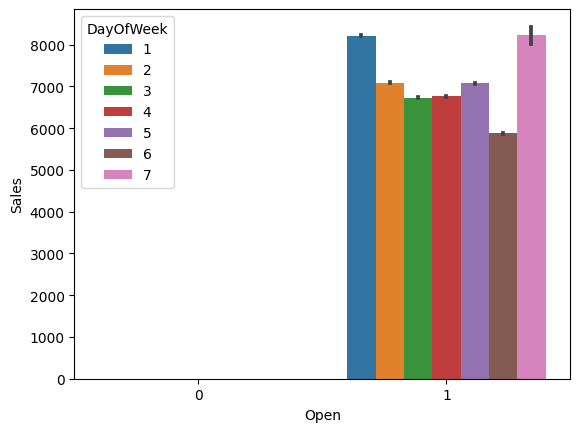

In [ ]:
# open and sales relationship
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

##### 1. Why did you pick the specific chart?

The choice of using a barplot as a visualization tool depends on the nature of the data and the specific insights or comparisons you want to convey. Here are a few reasons why someone might choose a barplot are for categorical data in when you want to compare different categories. Each category is represented by a bar,and height of bar correspond to the value of category. and Discrete Data, Visualizing Relationships, Simplicity and Clarity of Barplots are relatively simple and easy to interpret. They provide a clear visual representation of the data, making it accessible to a wide audience. The simplicity of barplots also makes them suitable for presentations or reports where you want to communicate information quickly and effectively.

##### 2. What is/are the insight(s) found from the chart?

from the above ploting graph we found that relation between sales and open (day of week) . we found that the number of sales day wise with respect to open.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes it helps us to know the number of sales according to day . and it gives positive impact for the growth for the bussiness.

#### Chart - 4

<Axes: xlabel='Open', ylabel='count'>

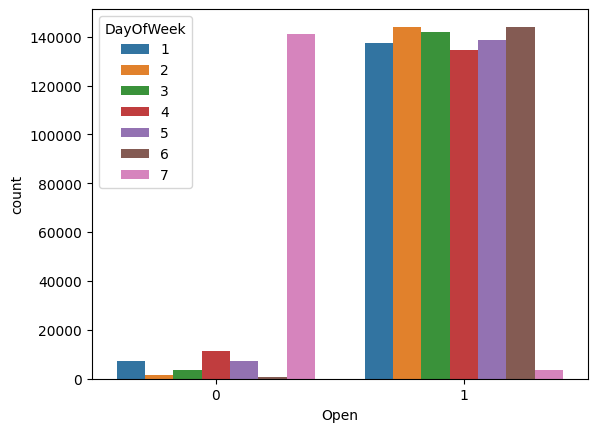

In [ ]:
#Lets see open, how many shops are open on which days
sns.countplot(x= df['Open'],hue= df['DayOfWeek'])

##### 1. Why did you pick the specific chart?

The choice of using a barplot as a visualization tool depends on the nature of the data and the specific insights or comparisons you want to convey. Here are a few reasons why someone might choose a barplot are for categorical data in when you want to compare different categories. Each category is represented by a bar,and height of bar correspond to the value of category. and Discrete Data, Visualizing Relationships, Simplicity and Clarity of Barplots are relatively simple and easy to interpret. They provide a clear visual representation of the data, making it accessible to a wide audience. The simplicity of barplots also makes them suitable for presentations or reports where you want to communicate information quickly and effectively

##### 2. What is/are the insight(s) found from the chart?

we found that number of shop open according to day. we saw that the most of the shop are closed on the sunday.Some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

we saw that the shop open and close on the which day.

#### Chart - 5

<Axes: xlabel='StoreType', ylabel='Sales'>

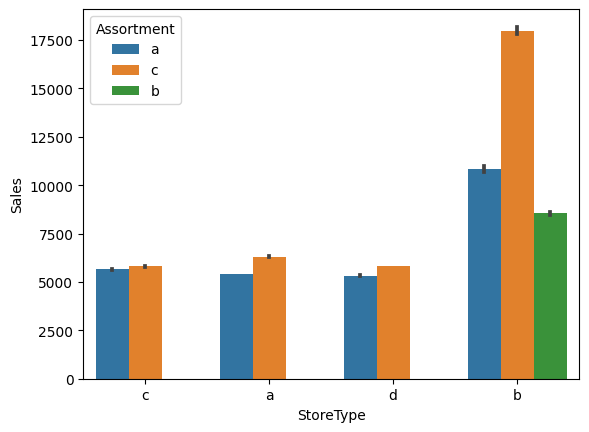

In [ ]:
# lets see the relationship between store type, assortment levels and sales
sns.barplot(x= df['StoreType'], y= df['Sales'] , hue= df['Assortment'])

##### 1. Why did you pick the specific chart?

The choice of using a barplot as a visualization tool depends on the nature of the data and the specific insights or comparisons you want to convey. Here are a few reasons why someone might choose a barplot are for categorical data in when you want to compare different categories. Each category is represented by a bar,and height of bar correspond to the value of category. and Discrete Data, Visualizing Relationships, Simplicity and Clarity of Barplots are relatively simple and easy to interpret. They provide a clear visual representation of the data, making it accessible to a wide audience. The simplicity of barplots also makes them suitable for presentations or reports where you want to communicate information quickly and effectively

##### 2. What is/are the insight(s) found from the chart?

from the above diagram we found that the relationship between sales and storetype and assortment level

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

from the visualization of sales vs storetype and assortment level we make a positive bussiness impact it helps us to improve the other store which gain less sales vs high sales gain storetype.


#### Chart - 6

In [ ]:
# Store Type and Sales exploring
store_type = df.groupby('StoreType')['Sales','Customers'].sum().reset_index()
store_type.sort_values(['Sales','Customers'],ascending= False,inplace=True)
print(store_type)

  StoreType       Sales  Customers
0         a  3165334859  363541434
3         d  1765392943  156904995
2         c   783221426   92129705
1         b   159231395   31465621


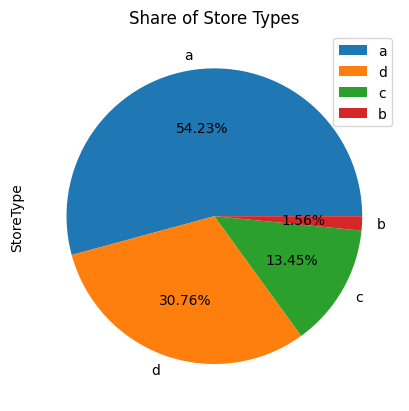

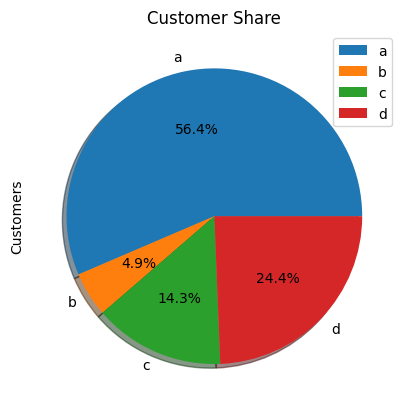

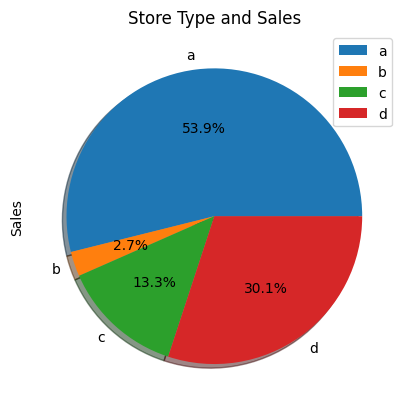

In [ ]:
#store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.2f%%')
plt.show()
# customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#let's explore store type a bit and it's influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is a common type of chart used to display categorical data as a circular graph. The chart is divided into slices, where each slice represents a category, and the size of the slice corresponds to the proportion or percentage of data belonging to that category. Pie charts are useful for visualizing relative proportions or percentages of different categories within a whole.



##### 2. What is/are the insight(s) found from the chart?

we found shares of store type with percent of storeype. and also found the customer and customer share percentage. store type sales percentage which shows that type of store is proving how much sales.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

this will helps us to make a decision in growth for bussiness. to improve our store type and increase sales .

#### Chart - 7

<Axes: xlabel='Customers', ylabel='Sales'>

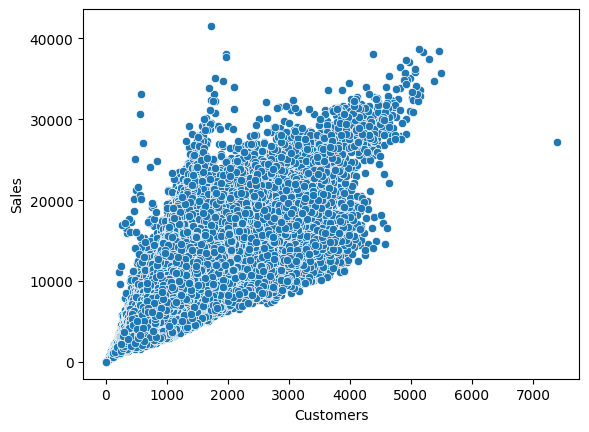

In [ ]:
#  Scatter plot of customer sales
sns.scatterplot(x=df['Customers'],y=df['Sales'])

##### 1. Why did you pick the specific chart?

A scatter plot is a type of data visualization that displays the relationship between two numerical variables. It consists of a grid where each point represents the values of the two variables on the X and Y axes. The position of each point on the graph represents the values of the variables for a specific data point.

##### 2. What is/are the insight(s) found from the chart?

we found that the positive corelation between customers and sales showing with different data point. and also it has few outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

it helps to know the customer intrest in purchase according to the different views. and it shows the reation and pattern between the customer and sales

#### Chart - 8

In [ ]:
# sales over year
sales_2013 = df[df['year']==2013]
sales_2014 = df[df['year']==2014]
sales_2015 = df[df['year']==2015]


In [ ]:
#  sales over month
sales_month_2013 = sales_2013.groupby('month')['Sales'].sum().reset_index()
sales_month_2014 = sales_2014.groupby('month')['Sales'].sum().reset_index()
sales_month_2015 = sales_2015.groupby('month')['Sales'].sum().reset_index()

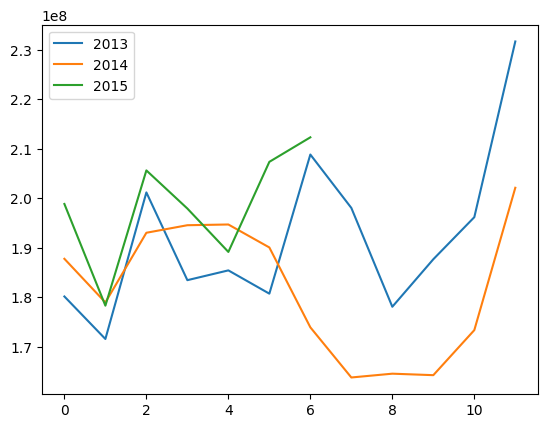

In [ ]:
# Plotting sales with time
plt.plot(sales_month_2013.loc[:,'Sales'],label='2013')
plt.plot(sales_month_2014.loc[:,'Sales'],label='2014')
plt.plot(sales_month_2015.loc[:,'Sales'],label='2015')
plt.legend()

##### 1. Why did you pick the specific chart?

Line plots are a versatile and valuable tool for data visualization, allowing you to explore and communicate relationships, trends, and patterns in your data effectively using line.

##### 2. What is/are the insight(s) found from the chart?

we found sales trend and pattern over time from the above chart.
we saw that in the graph sales is increasing and decreasing over the time period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

we saw that when sales is increasing and decreasing. it can helps us to take decision for increasing sales and decreasing sales over time.

#### Chart - 9

<Axes: ylabel='Density'>

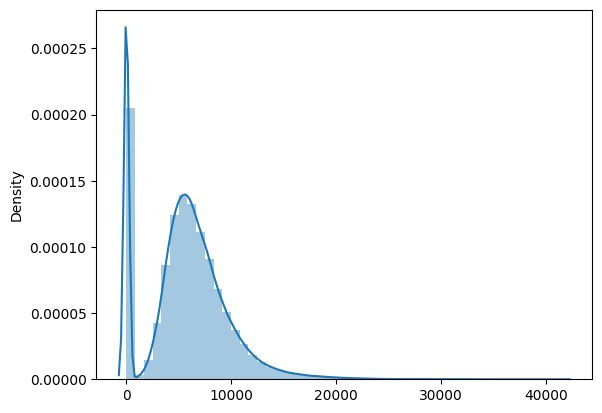

In [ ]:
#distribution plot of Sales, as expected positively skewed.
sns.distplot(x=df['Sales'])

##### 1. Why did you pick the specific chart?

The distribution plot, is used to visualize the distribution of a single variable or compare the distributions between multiple variables. It combines elements of a histogram, a kernel density estimation (KDE) plot, and a rug plot to provide a comprehensive view of the data's distribution.

##### 2. What is/are the insight(s) found from the chart?

The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. This drop was also seen in the Sales over the years plot earlier.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

it help us to see the density for sales, which help to know the data positively skewed or negatively skewed.

#### Chart - 10 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'year', 'weekofyear', 'dayofyear']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)


<Axes: >

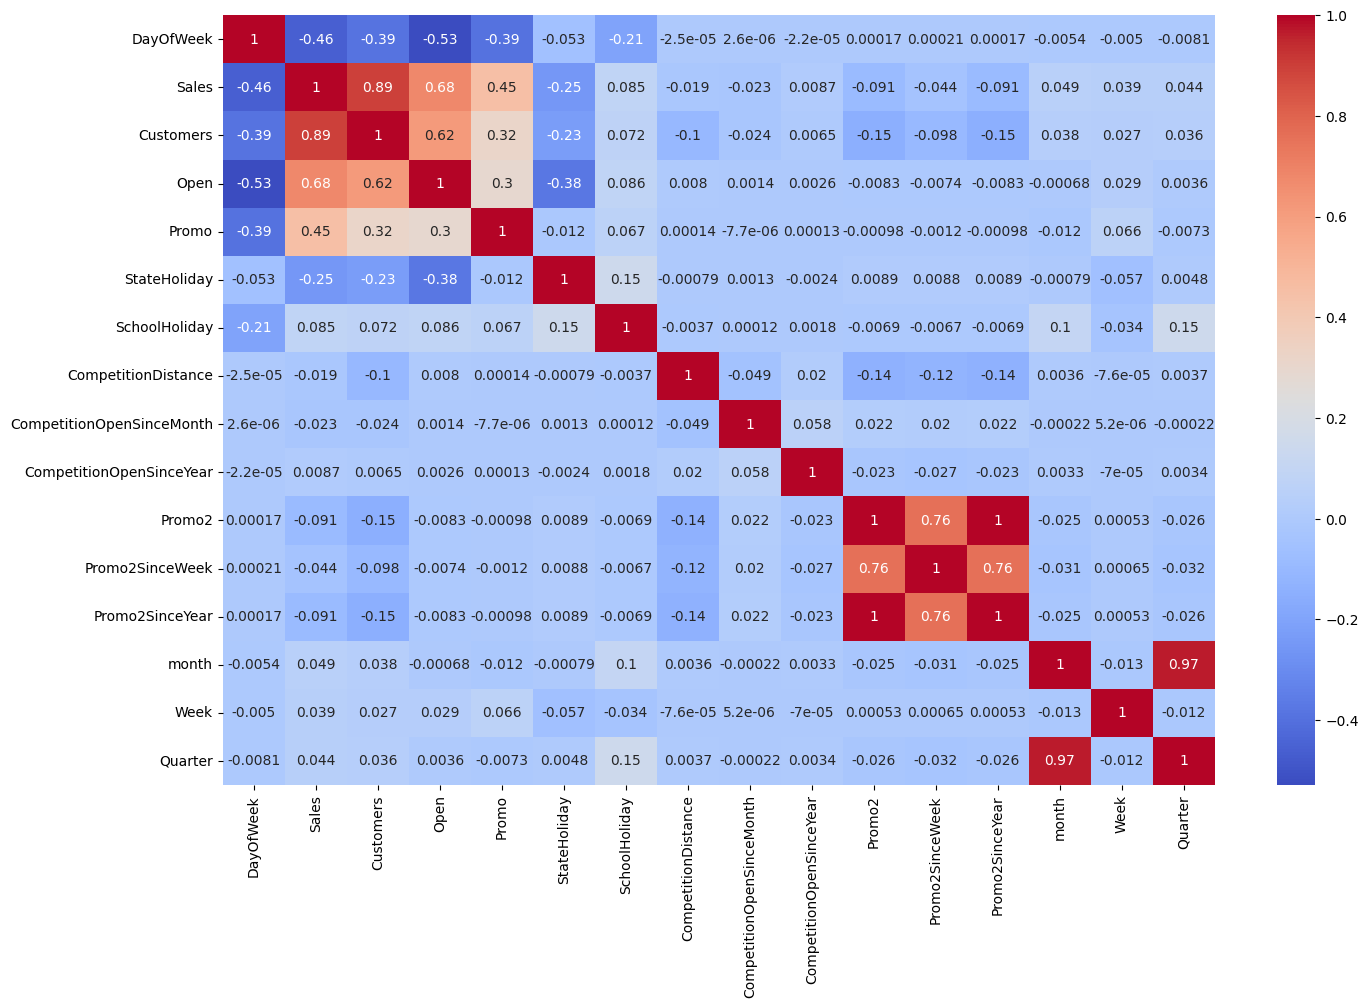

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

##### 1. Why did you pick the specific chart?

Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all.

##### 2. What is/are the insight(s) found from the chart?

we found the relation between the variable . we do the visualisation using heatmap which shows the corelation between each independent variable . the nearest value to 1 is positively correlated or the value nearest to 0 or negative value  is negatively corelated variable.

#### Chart - 11 - Pair Plot

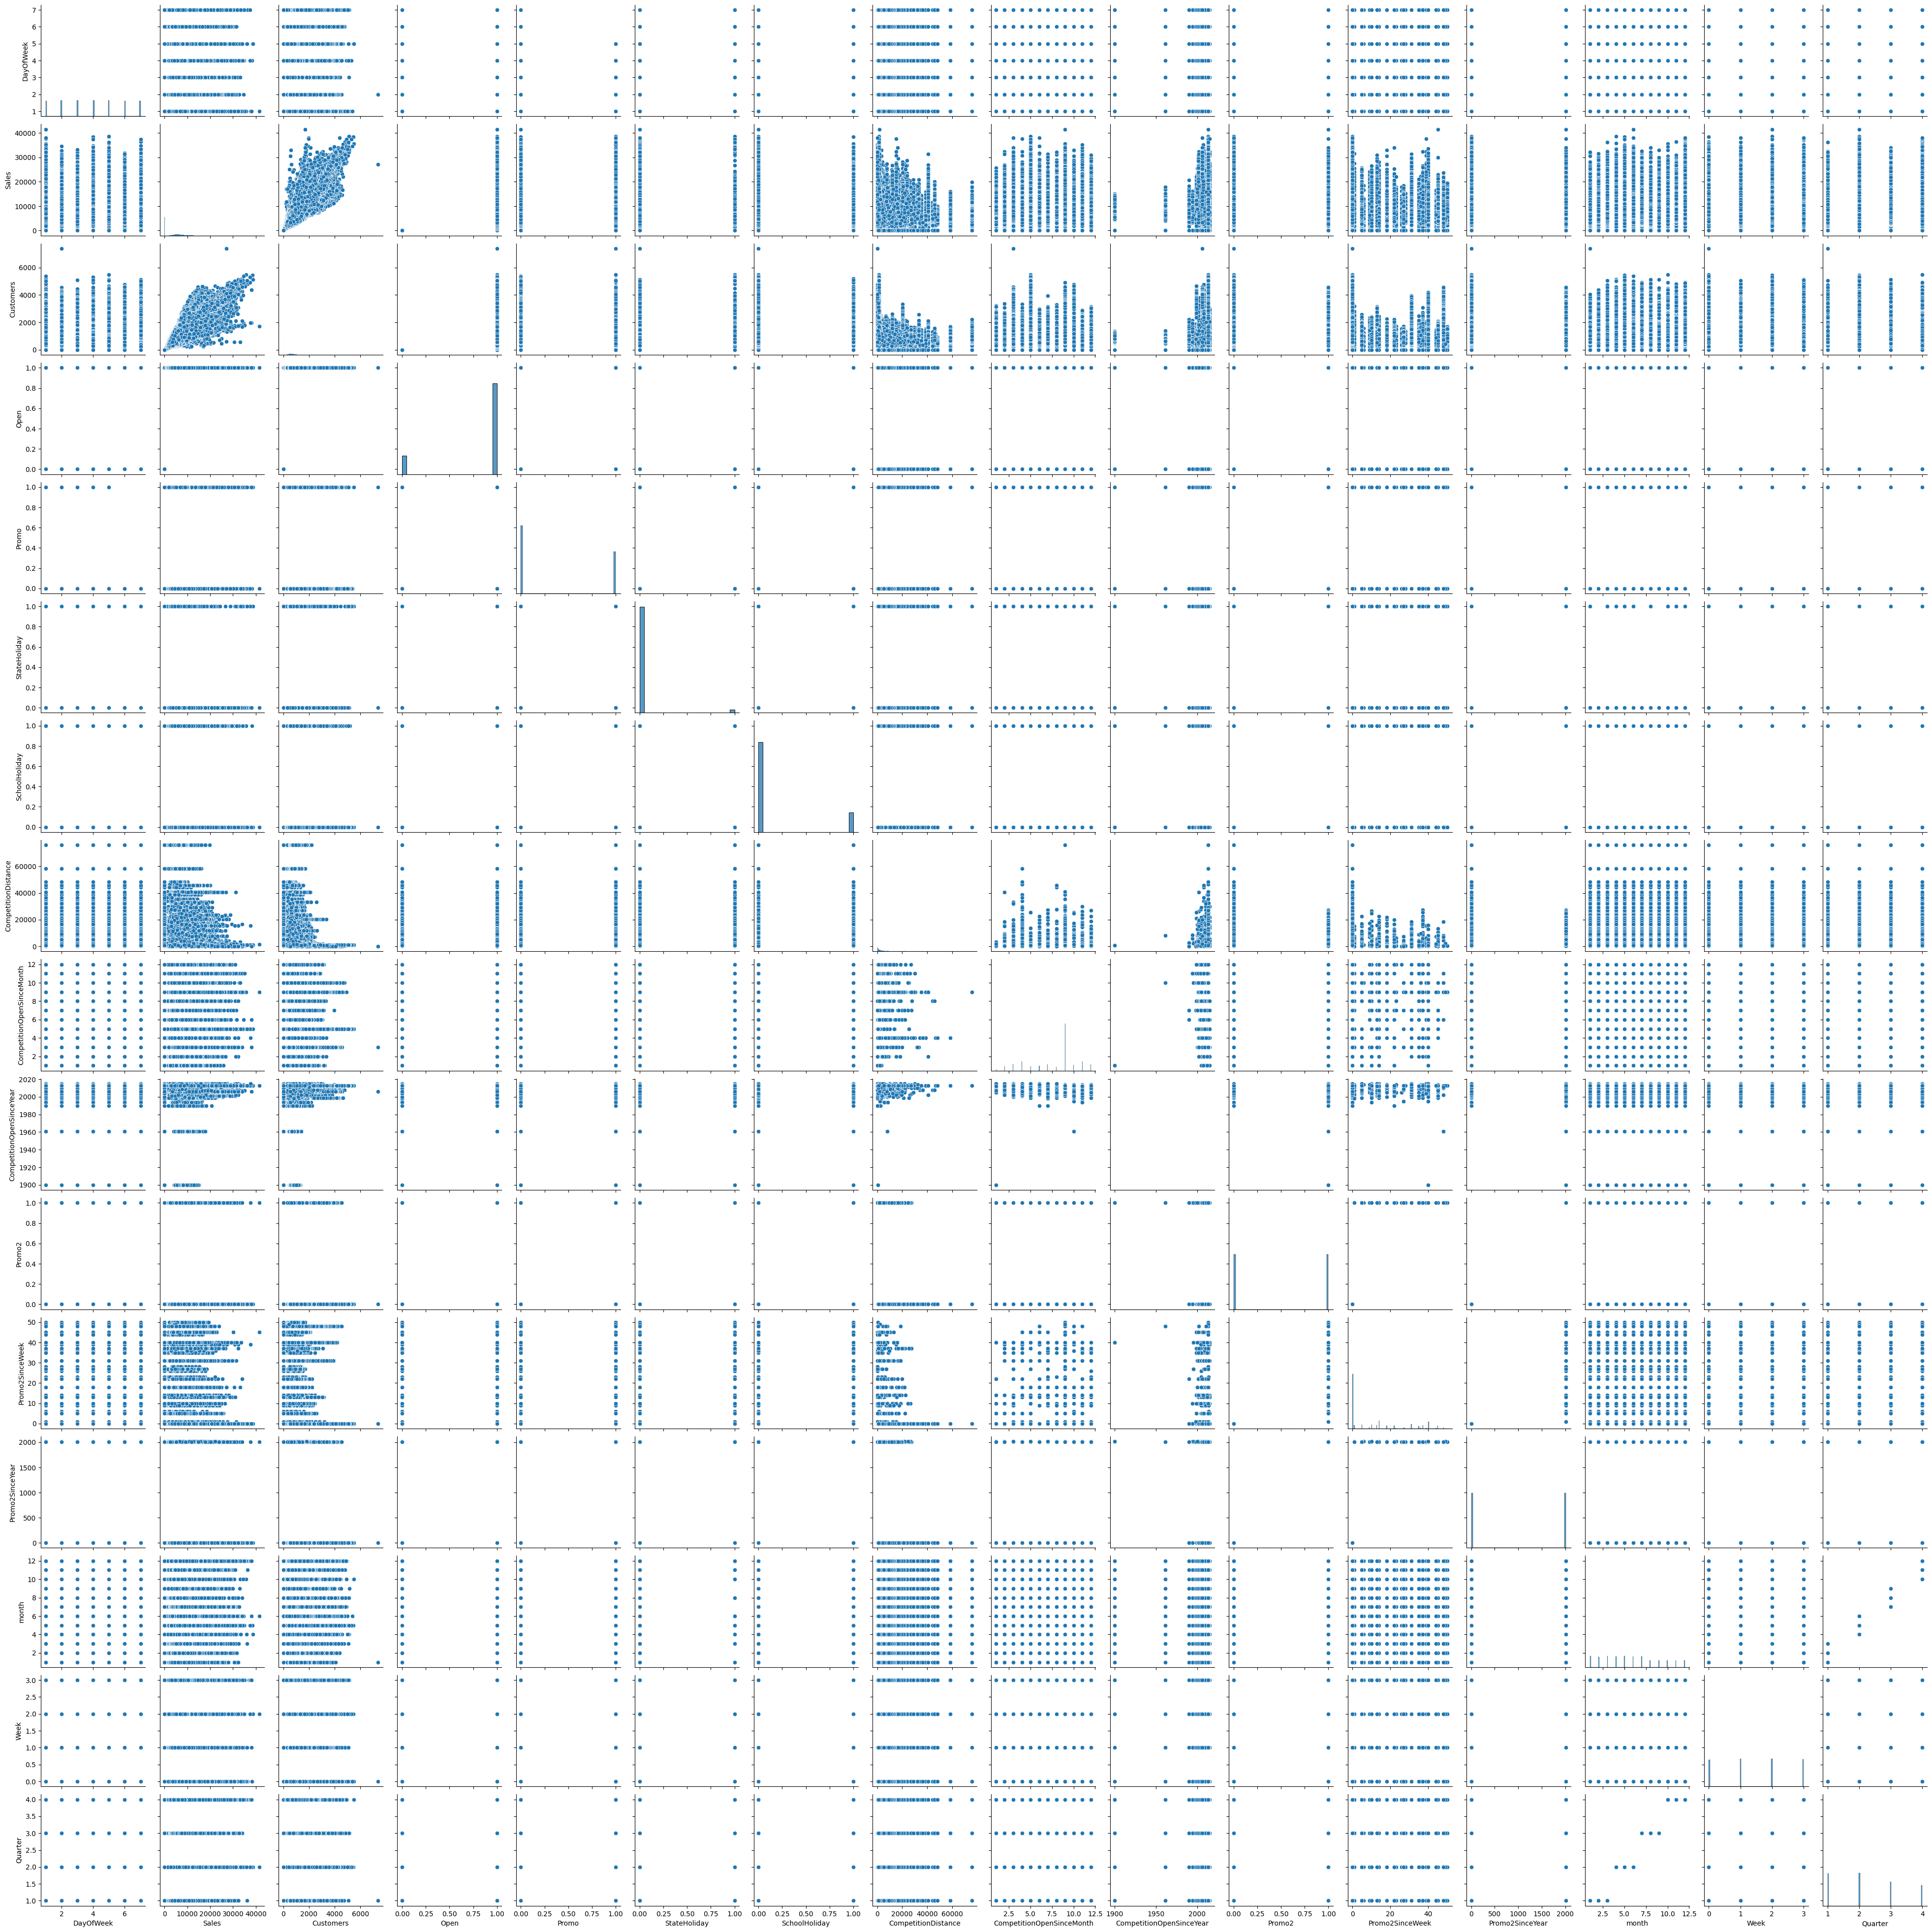

In [ ]:
# Pair Plot visualization code
sns.pairplot(corr_df)

In [ ]:
selected_columns = ['Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']
subset_data = df[selected_columns]


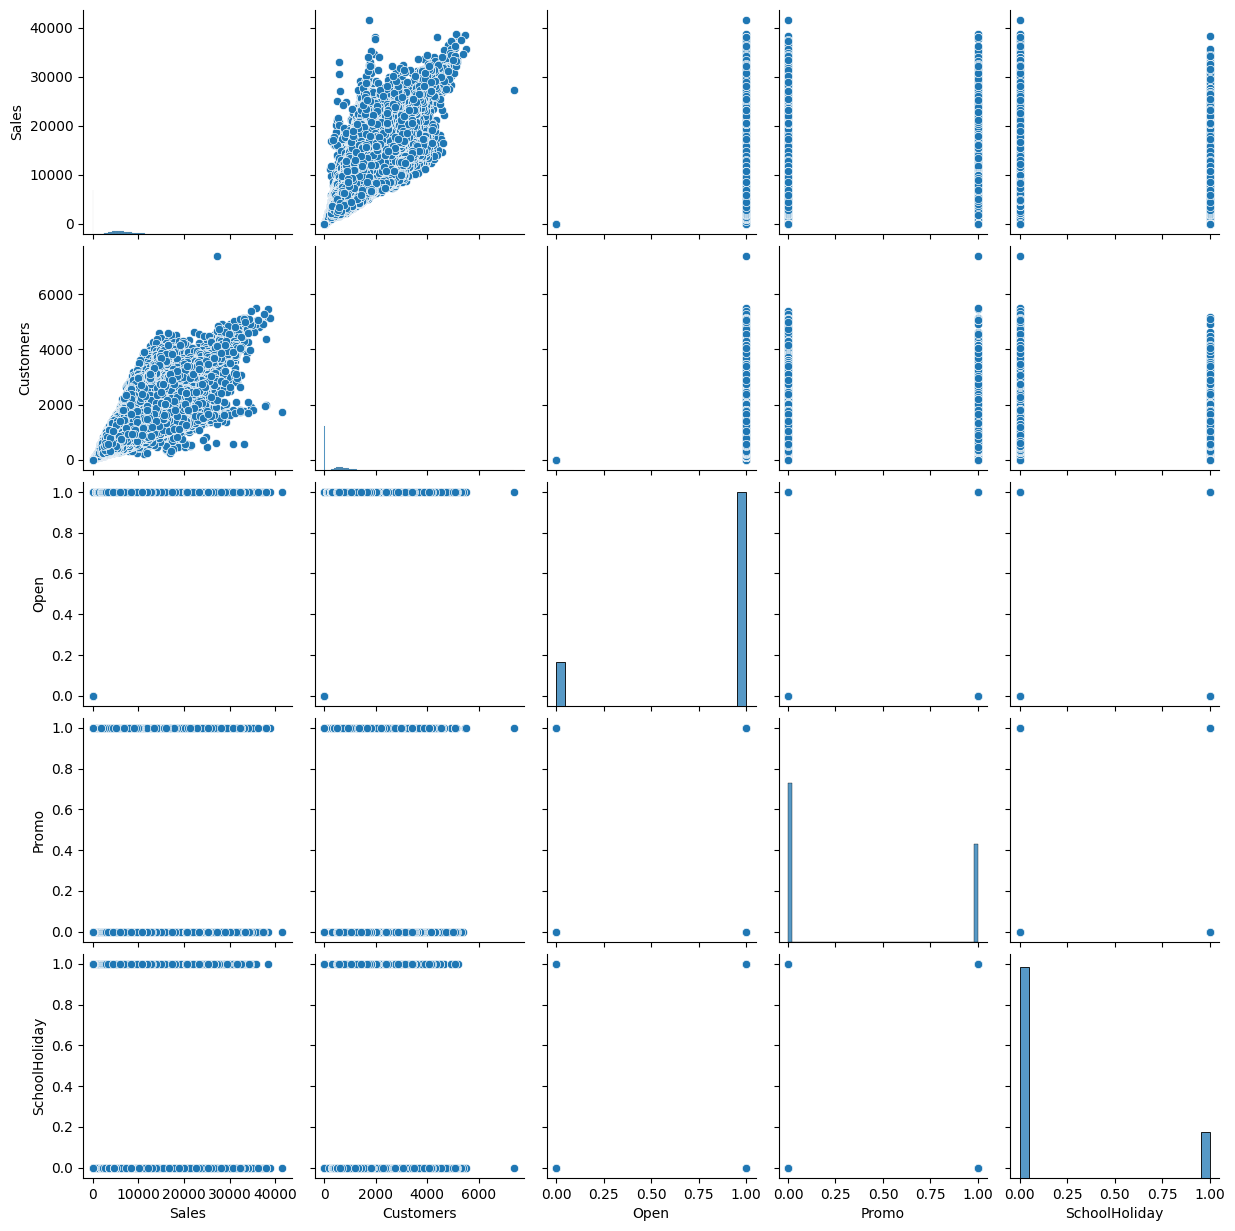

In [ ]:
sns.pairplot(subset_data)

##### 1. Why did you pick the specific chart?

The pairplot function in seaborn is used to create a matrix of scatter plots or other plots to visualize the relationships between multiple variables in a dataset. It is a convenient way to explore pairwise relationships between variables in a DataFrame.

##### 2. What is/are the insight(s) found from the chart?

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### Stores as null hypothesis(h0)
1. Stores with more employees sell more
2. Stores with bigger available stock sell more
3. Bigger stores sell more
4. Stores near competitors sell less
5. Stores with newly opened competitors sell less


#### Alternate Hypothesys(Ha)

1. Stores with more employees sell less
2. Store with bigger available stock sell less
3. bigger store sell less
4. store near competitors sell more
5. Store with newly opened competitor sell more

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
year                         0
month                        0
weekofyear                   0
dayofyear                    0
Week                         0
Quarter                      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

we can see that above information. there is no any missing value present in any column.

In [ ]:
#  values count for promointerval column
df['PromoInterval'].value_counts()

0                   508031
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64

In [ ]:
# change the value 0 to no promo
df.loc[df['PromoInterval'] == 0, 'PromoInterval'] = 'No Promo'

In [ ]:
#  now we recheck see that the values sucessfully replaced
df['PromoInterval'].value_counts()

No Promo            508031
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
ddf = pd.get_dummies(df, columns=['Assortment', 'StoreType', 'PromoInterval'],
                               prefix=['Assortment', 'StoreType', 'PromoInterval'])

In [ ]:
ddf.shape

(1017209, 32)

In [ ]:
ddf.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,Assortment_b,Assortment_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_No Promo
0,1,5,2015-07-31,5263,555,1,1,0,1,1270.0,...,0,0,0,0,1,0,0,0,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1,570.0,...,0,0,1,0,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,1,0,1,14130.0,...,0,0,1,0,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,620.0,...,0,1,0,0,1,0,0,0,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1,29910.0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 32 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Customers                       1017209 non-null  int64         
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   StateHoliday                    1017209 non-null  int64         
 8   SchoolHoliday                   1017209 non-null  int64         
 9   CompetitionDistance             1017209 non-null  float64       
 10  CompetitionOpenSinceMonth       1017209 no

#### What all categorical encoding techniques have you used & why did you use those techniques?

i have done one hot encoading and One-hot encoding is a technique used in machine learning and data analysis to represent categorical variables as binary vectors. It is commonly used when dealing with categorical data, where each category is represented as a separate binary feature.

The main purpose of one-hot encoding is to convert categorical variables into a format that can be used for numerical computations by machine learning algorithms. These algorithms typically work with numerical inputs, so converting categorical variables to numerical representations is necessary for them to process the data.

### 8. Data Splitting

In [ ]:
#  dropping unwanted column
ddf.drop(['Store','Date'],axis=1,inplace=True)

In [ ]:
# Creating dependent/target and independent variables:
target_col = ddf['Sales']
input_cols = ddf.columns.drop('Sales')

In [ ]:
input_cols

Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'year', 'month', 'weekofyear', 'dayofyear', 'Week',
       'Quarter', 'Assortment_a', 'Assortment_b', 'Assortment_c',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_No Promo'],
      dtype='object')

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split(ddf[input_cols],target_col,test_size=0.2,random_state=1)

In [ ]:
# shape of split dataset
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((813767, 29), (203442, 29), (813767,), (203442,))

In [ ]:
x_train.head()

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,...,Assortment_b,Assortment_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_No Promo
903560,5,576,1,1,0,0,2370.0,3.0,2011.0,1,...,0,0,1,0,0,0,0,1,0,0
509452,2,1163,1,1,0,0,2850.0,7.0,2014.0,0,...,0,0,1,0,0,0,0,0,0,1
570376,3,685,1,1,0,1,1220.0,12.0,2010.0,0,...,0,0,1,0,0,0,0,0,0,1
264963,1,1162,1,1,0,0,8040.0,9.0,2013.0,0,...,0,1,0,0,0,1,0,0,0,1
961639,2,826,1,1,0,0,5800.0,9.0,2010.0,0,...,0,0,0,0,0,1,0,0,0,1


##### What data splitting ratio have you used and why?

i am using 20% of data for testing and 80% of data for training data . because it is good for model traing and testing . we can also use 25% of data for test and 75% of data for train.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
scalar =  StandardScaler()
scaled_x_train = scalar.fit_transform(x_train)
scaled_x_test =  scalar.transform(x_test)


In [ ]:
scaled_x_train[0:5]

array([[ 0.50135093, -0.12242251,  0.45245456,  1.27511523, -0.17758234,
        -0.46613808, -0.39587662, -1.72256925,  0.17613251,  0.9987314 ,
         1.84963182,  1.00096549, -1.07033906, -0.55535214, -0.59721145,
        -0.59330931,  1.33851336, -0.27211261,  0.94560951, -0.09015562,
        -0.93042192,  0.91898885, -0.125448  , -0.39334259, -0.66774016,
        -0.36321714,  1.57095041, -0.32535675, -0.9987314 ],
       [-1.00044299,  1.14388701,  0.45245456,  1.27511523, -0.17758234,
        -0.46613808, -0.33358031, -0.28300418,  0.73996907, -1.00127021,
        -0.76044074, -1.00126953,  0.21623855, -0.55535214, -0.66651478,
        -0.70159359,  0.44025053, -0.27211261,  0.94560951, -0.09015562,
        -0.93042192,  0.91898885, -0.125448  , -0.39334259, -0.66774016,
        -0.36321714, -0.63655733, -0.32535675,  1.00127021],
       [-0.49984502,  0.11271844,  0.45245456,  1.27511523, -0.17758234,
         2.14528709, -0.54512821,  1.51645216, -0.01181301, -1.00127021,
  

#### Linear Regression Model


In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(scaled_x_train,y_train)

LinearRegression()

In [ ]:
#  predicting test value
y_pred = regressor.predict(scaled_x_test)
y_pred

array([ 8269.94161093,  5577.94161093,  4903.94161093, ...,
        -210.05838907,  3143.44161093, 12501.94161093])

In [ ]:
# After building the model we are comparing the actual and the predicted values in this code:
data = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
data

,actual,predicted
985837,9609,8269.941611
462798,6670,5577.941611
756833,4967,4903.941611
83457,8301,10375.941611
250151,8889,6655.941611
...,...,...
631829,6165,5769.941611
456185,9206,9261.941611
37433,0,-210.058389
899700,1961,3143.441611


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
R2_S1 = r2_score(y_test,y_pred)
m_a_e1 = mean_absolute_error(y_test,y_pred)
m2_e1 = mean_squared_error(y_test,y_pred)
rmse1 = math.sqrt(mean_squared_error(y_test,y_pred))
print('Performance of Linear Regression Model')
print('*'*40,'\n')
print('R2_score : ',R2_S1)
print('Mean Absolute error : ',m_a_e1)
print('Mean Squared Error : ',m2_e1)
print('Root mean square error : ',rmse1)

Performance of Linear Regression Model
**************************************** 

R2_score :  0.901140724464013
Mean Absolute error :  872.5505075478713
Mean Squared Error :  1472894.08109883
Root mean square error :  1213.6284773763468


we see in the above ml model regression we found that
R2_score :  0.901140724464013

Mean Absolute error :  872.5505075478713

Mean Squared Error :  1472894.08109883

Root mean square error :  1213.6284773763468
r2 score is tends to 1 which show that model is good model.
and MSe and RMSE is as tends to 0 it shows that it is good model.

#### ML  MODEL -2 Random forest and cross validation, hyper parameter

#### Cross- Validation & Hyperparameter Tuning

Hyperparameter tuning is the process of finding the optimal values for these hyperparameters to achieve the best performance from the model. It aims to find the hyperparameter configuration that generalizes well to unseen data and minimizes the model's error or maximizes the evaluation metric.

Grid search is a commonly used technique for hyperparameter tuning. It involves defining a grid of possible hyperparameter values and evaluating the model's performance on each combination of values using cross-validation. The combination that yields the best performance is selected as the optimal set of hyperparameters.

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = RandomForestRegressor(random_state=42)

param_grid = {'n_estimators':[10],
              'max_depth':[50],
              'min_samples_split':[20]}

# Fit the Algorithm
grid_search = GridSearchCV(model,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error')
grid_train = grid_search.fit(scaled_x_train,y_train)


In [ ]:
# Get the best model
best_model = grid_train.best_estimator_
best_model.fit(scaled_x_train,y_train)

RandomForestRegressor(max_depth=50, min_samples_split=20, n_estimators=10,
                      random_state=42)

In [ ]:
# Make predictions on the test set
y_pred1 = best_model.predict(scaled_x_test)

In [ ]:
# Calculate evaluation metrics
m2_e2 = mean_squared_error(y_test, y_pred1)
m_a_e2 = mean_absolute_error(y_test,y_pred1)
rmse_2 = m2_e2 ** 0.5
r2_s_2 = r2_score(y_test,y_pred1)
print('Performance of Random Forest Regression Model')
print('_'*45,'\n')
print('mse2 : ',m2_e2)
print('mean absolute error2 : ',m_a_e2)
print('rmse2 : ',rmse_2)
print('r2score2 : ',r2_s_2)

Performance of Random Forest Regression Model
_____________________________________________ 

mse2 :  238297.5834644883
mean absolute error2 :  293.12773592573836
rmse2 :  488.1573347441256
r2score2 :  0.984005688687607


In [ ]:
m = pd.DataFrame({'predicted': y_pred1,'actual':y_test})
m

,predicted,actual
985837,9251.278810,9609
462798,6575.340799,6670
756833,4722.136709,4967
83457,8641.174915,8301
250151,7846.563239,8889
...,...,...
631829,5292.607855,6165
456185,9029.455078,9206
37433,0.000000,0
899700,2502.098553,1961


#### Feature Importance

In [ ]:
#Lets Find Importance of each Feature
feature_importance = best_model.feature_importances_

In [ ]:
# Lets make a dataframe consists of features and values
columns = list(x_train.columns)
features_importance = pd.DataFrame({'Features':columns,'Importance':feature_importance})
features_importance.set_index('Features',inplace=True)
features_importance.sort_values(by=['Importance'],inplace=True,ascending=False)
features_importance

,Importance
Features,
Customers,0.867999
CompetitionDistance,0.031371
StoreType_d,0.023958
Promo,0.017791
Assortment_b,0.009543
CompetitionOpenSinceYear,0.008549
Promo2SinceWeek,0.006755
CompetitionOpenSinceMonth,0.006722
StoreType_b,0.006128


##### Which hyperparameter optimization technique have you used and why?

i have used gridsearch cv to or hyperparameter to optimize the model. and we got the r2score is 0.98 is good.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
Mean Squared Error (MSE): MSE is a widely used metric for regression problems. It measures the average squared difference between the predicted and actual values. A lower MSE indicates better performance, with 0 indicating a perfect fit. However, MSE is sensitive to outliers since it squares the errors.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE. It has the same unit as the target variable, making it more interpretable. Like MSE, a lower RMSE indicates better model performance.

R-squared (R2) Score: R2 measures the proportion of the variance in the target variable that is explained by the model. It ranges from 0 to 1, with higher values indicating a better fit. An R2 score of 1 represents a perfect fit, while a score of 0 means the model performs no better than a baseline model.

we can see in aboove cross validation and random forest regressor features importance and ML model prediction.
in above metrics score we can see that Mean squared error  :  238297.5834644883
or Root mean squared error is :  488.1573347441256
R2 Score  :  0.984005688687607
r2score is tends to 1 is better for ml model.

### ML Model - 3 XGBoost Model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Building XGBoost Regressor Model:
xgb = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)
xgb.fit(scaled_x_train,y_train)

y_pred2 = xgb.predict(scaled_x_test)

In [ ]:
# Visualizing evaluation Metric Score chart
R2_S3 = r2_score(y_test,y_pred2)
m_a_e3 = mean_absolute_error(y_test,y_pred2)
m2_e3 = mean_squared_error(y_test,y_pred2)
rmse3 = math.sqrt(mean_squared_error(y_test,y_pred2))
print('Performance of Xgboost Model')
print('*'*40,'\n')
print('R2_score : ',R2_S3)
print('Mean Absolute error : ',m_a_e3)
print('Mean Squared Error : ',m2_e3)
print('Root mean square error : ',rmse3)

Performance of Xgboost Model
**************************************** 

R2_score :  0.9388323383042944
Mean Absolute error :  657.5458537874456
Mean Squared Error :  911330.640223683
Root mean square error :  954.6363916296524


Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




XGBoost's capabilities in predictive modeling, feature importance analysis, handling complex data, ensemble learning, scalability, interpretability, and real-time learning make it a valuable tool for businesses aiming to improve decision-making, optimize processes, and gain a competitive advantage.

here we can see from the sg boost model

R2_score :  0.9388323383042944

Mean Absolute error :  657.5458537874456

Mean Squared Error :  911330.640223683

Root mean square error :  954.6363916296524

This is good Ml model r2score is near to 1 shows that our model prediction is almost good.

### ML Model - 4

In [ ]:
# ML Model - 3 Implementation
model = DecisionTreeRegressor()

# Fit the Algorithm
model.fit(scaled_x_train,y_train)

# Predict on the model
y_pred3 = model.predict(scaled_x_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
R2_S4 = r2_score(y_test,y_pred3)
m_a_e4 = mean_absolute_error(y_test,y_pred3)
m2_e4 = mean_squared_error(y_test,y_pred3)
rmse4 = math.sqrt(mean_squared_error(y_test,y_pred3))
print('Performance of Xgboost Model')
print('*'*40,'\n')
print('R2_score : ',R2_S4)
print('Mean Absolute error : ',m_a_e4)
print('Mean Squared Error : ',m2_e4)
print('Root mean square error : ',rmse4)

Performance of Xgboost Model
**************************************** 

R2_score :  0.9727221706741597
Mean Absolute error :  383.06922366079766
Mean Squared Error :  406409.54671601736
Root mean square error :  637.5025856543779


### 2. Explain the model which you have used and the feature importance using any model explainability tool?

we have used decision tree regression. and we obtained that
R2_score :  0.9724492096313864

Mean Absolute error :  383.93051582269146

Mean Squared Error :  410476.3649492239

Root mean square error :  640.6842942894916


#### RESULT :-

Here we are using R2-Score, Mean Absolute Error (MAE) and Root mean Suared error (RMSE) for evaluation of the performance of the ML Models. We Know that, for an Ideal model, r2-score should be equal to 1 and the value of MAEand RSME should be zero. So, let's compare the results given by the four models which we have built.

In [ ]:
result = {"model":['Linear Regression','Random Forest','Xgboost','Decision Tree'],
          'R2score':[R2_S1,r2_s_2,R2_S3,R2_S4],
          'RMSE':[rmse1,rmse_2,rmse3,rmse4],
          'MAE':[m_a_e1,m_a_e2,m_a_e3,m_a_e4]}

result_df = pd.DataFrame(result)
result_df

,model,R2score,RMSE,MAE
0,Linear Regression,0.901141,1213.628477,872.550508
1,Random Forest,0.984006,488.157335,293.127736
2,Xgboost,0.938832,954.636392,657.545854
3,Decision Tree,0.972722,637.502586,383.069224


so, here we are using R2-score , mean absolute error and root mean square for evaluation(MAE), and root mean square error (RMSE) for evaluation of the performance of the ML model. we know the the ideal model should r2score is equal to 1 or nearest to 1. and the value of rmse and mae should be 0.
so we have compared the overall result in above result_df as  we can see that the our Random forest ML model is better than all other three model. because r2score of random forest is more nearest to other ml model and rmse and mae is more near to 0.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
loaded_model

RandomForestRegressor(max_depth=50, min_samples_split=20, n_estimators=10,
                      random_state=42)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In [ ]:
result_df

,model,R2score,RMSE,MAE
0,Linear Regression,0.901141,1213.628477,872.550508
1,Random Forest,0.984006,488.157335,293.127736
2,Xgboost,0.938832,954.636392,657.545854
3,Decision Tree,0.972722,637.502586,383.069224



From the above result shown Out of the four methods, Random Forest proved to be the most accurate, achieving a R2_Score of 0.984006, MAE of 293.127736 and RMSE of 488.157335. While it has the lowest error of all methods, it requires more work than the other three approaches and hence, comsumes more time to produce results.

From results, we can see that most important feature on which sale of store depends is 'Customers'. Also, the customer feature seems to depend on other features like Competition distance, Store type , Promo etc.

So, now we can say that the Rossmann store person can now implement the Random Forest Model and utilise the feature importance data for predicting the sales for next six months.






### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***